In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('C:/Users/Administrator/Desktop/Proyecto NLP/NLP_Youtube_9/data/youtoxic_english_1000.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...    False      False   
1  Law enforcement is not trained to shoot to app...     True       True   
2  \nDont you reckon them 'black lives matter' ba...     True       True   
3  There are a very large number of people who do...    False      False   
4  The Arab dude is absolutely right, he should h...    False      False   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0     False          False      False         False     False          False   
1     False          False      False         False     False          False   
2     False          False       True         False     False 

In [6]:
#Obtener los nombres como una lista
column_names = df.columns.tolist()
print(df.columns)

Index(['CommentId', 'VideoId', 'Text', 'IsToxic', 'IsAbusive', 'IsThreat',
       'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
       'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
       'IsRadicalism'],
      dtype='object')


In [14]:
# Calcular los porcentajes
# Lista de columnas a analizar
columns_to_analyze = ['IsToxic', 'IsAbusive', 'IsThreat',
                      'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
                      'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
                      'IsRadicalism']

# Calcular los porcentajes para cada columna
for column in columns_to_analyze:
    percentages = df[column].value_counts(normalize=True) * 100
    print(f"\nPorcentajes para {column}:")
    print(percentages)


Porcentajes para IsToxic:
IsToxic
False    53.8
True     46.2
Name: proportion, dtype: float64

Porcentajes para IsAbusive:
IsAbusive
False    64.7
True     35.3
Name: proportion, dtype: float64

Porcentajes para IsThreat:
IsThreat
False    97.9
True      2.1
Name: proportion, dtype: float64

Porcentajes para IsProvocative:
IsProvocative
False    83.9
True     16.1
Name: proportion, dtype: float64

Porcentajes para IsObscene:
IsObscene
False    90.0
True     10.0
Name: proportion, dtype: float64

Porcentajes para IsHatespeech:
IsHatespeech
False    86.2
True     13.8
Name: proportion, dtype: float64

Porcentajes para IsRacist:
IsRacist
False    87.5
True     12.5
Name: proportion, dtype: float64

Porcentajes para IsNationalist:
IsNationalist
False    99.2
True      0.8
Name: proportion, dtype: float64

Porcentajes para IsSexist:
IsSexist
False    99.9
True      0.1
Name: proportion, dtype: float64

Porcentajes para IsHomophobic:
IsHomophobic
False    100.0
Name: proportion, dtype: flo

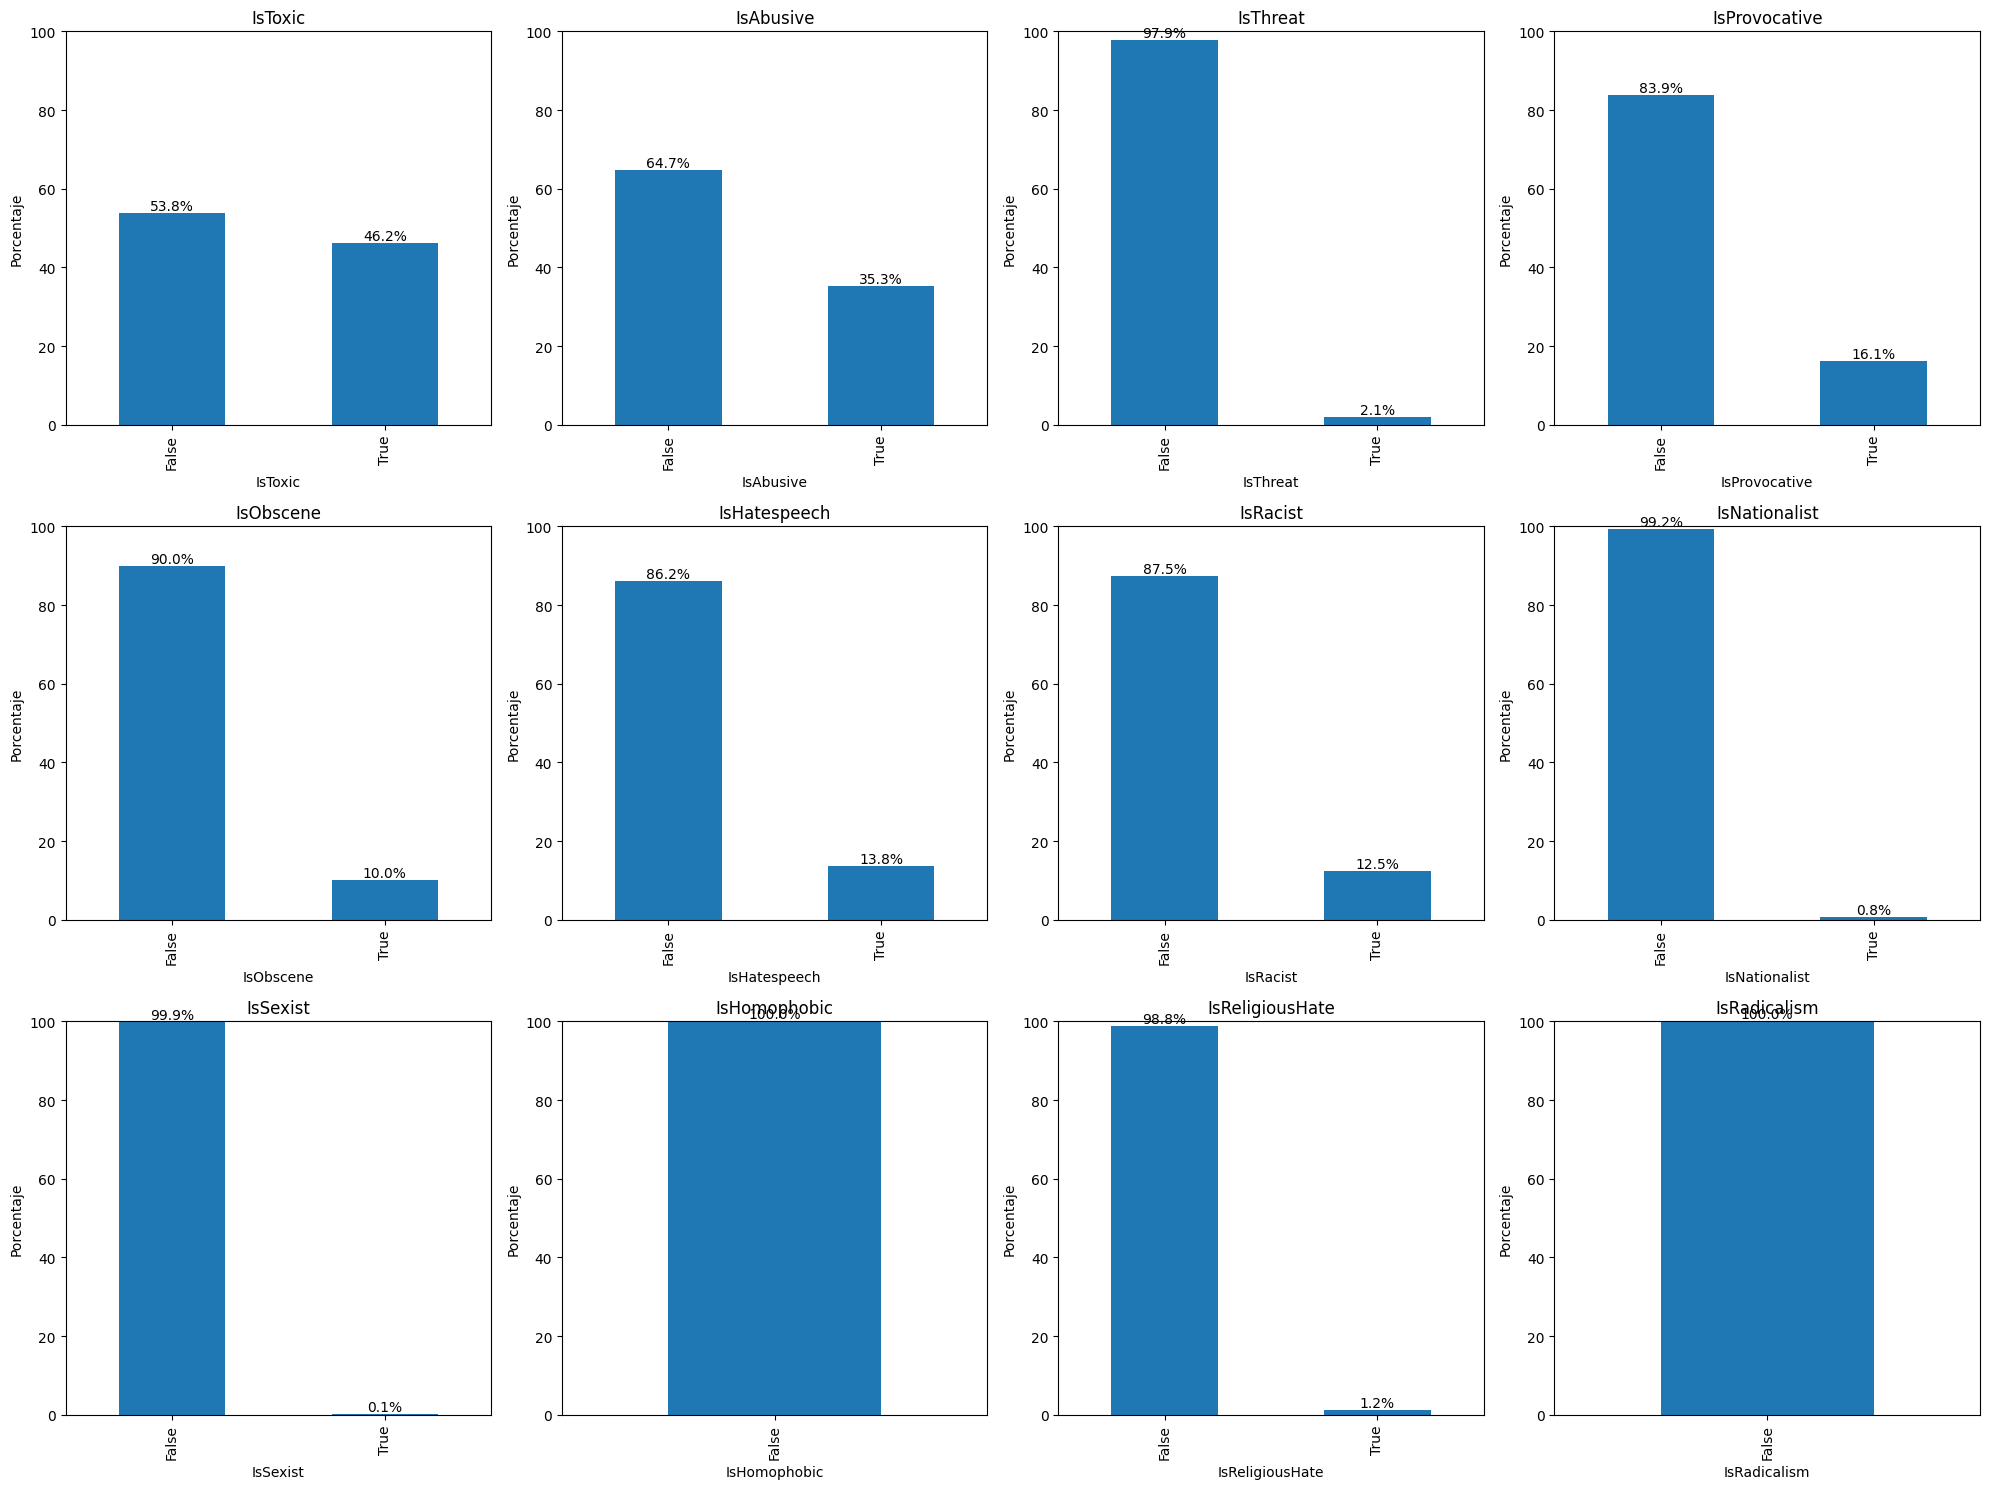

In [15]:
import matplotlib.pyplot as plt

# Lista de columnas a analizar (asumiendo que es la misma que usaste antes)
columns_to_analyze = ['IsToxic', 'IsAbusive', 'IsThreat',
                      'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist',
                      'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate',
                      'IsRadicalism']

# Crear la figura para los gráficos
plt.figure(figsize=(20, 15))

# Iterar sobre las columnas y crear un gráfico para cada una
for i, column in enumerate(columns_to_analyze, 1):
    # Obtener los porcentajes (asumiendo que están en el mismo orden que se imprimieron)
    percentages = df[column].value_counts(normalize=True) * 100
    
    # Crear un subgráfico
    plt.subplot(3, 4, i)
    
    # Crear gráfico de barras
    percentages.plot(kind='bar')
    
    # Configurar el gráfico
    plt.title(column)
    plt.ylabel('Porcentaje')
    plt.ylim(0, 100)  # Establecer el límite del eje y de 0 a 100%
    
    # Añadir etiquetas de porcentaje en las barras
    for j, v in enumerate(percentages):
        plt.text(j, v, f'{v:.1f}%', ha='center', va='bottom')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

In [18]:
# Unir todas las features en una única hateMessage

# Crear la nueva columna 'hateMessage'
df['hateMessage'] = df[columns_to_analyze].any(axis=1)

# Suponiendo que quieres mantener otras dos columnas, por ejemplo 'text' y 'language'
# (reemplaza estos nombres con las columnas que realmente quieres mantener)
columns_to_keep = ['CommentId', 'VideoId', 'Text', 'hateMessage']

# Crear un nuevo DataFrame con solo las columnas deseadas
new_df = df[columns_to_keep]

# Mostrar las primeras filas del nuevo DataFrame
print(new_df.head())

# Verificar las columnas del nuevo DataFrame
print(new_df.columns)



              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  hateMessage  
0  If only people would just take a step back and...        False  
1  Law enforcement is not trained to shoot to app...         True  
2  \nDont you reckon them 'black lives matter' ba...         True  
3  There are a very large number of people who do...        False  
4  The Arab dude is absolutely right, he should h...        False  
Index(['CommentId', 'VideoId', 'Text', 'hateMessage'], dtype='object')


In [20]:
#Calcular porcentaje columna hatemessage
percentages_hate = df['hateMessage'].value_counts(normalize=True) * 100
print(f"\nPorcentajes para {column}:")
print(percentages_hate)


Porcentajes para IsRadicalism:
hateMessage
False    53.8
True     46.2
Name: proportion, dtype: float64


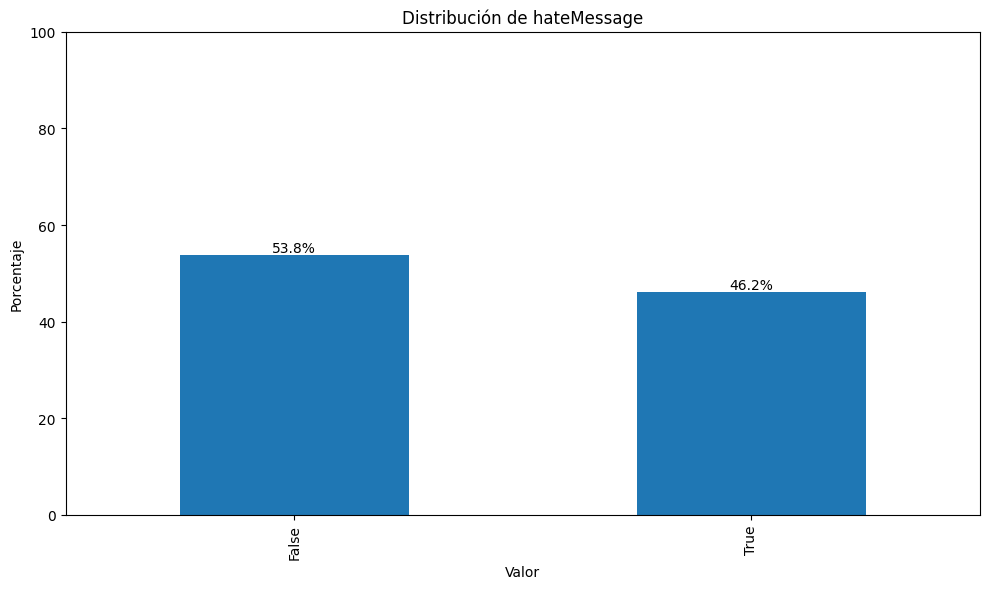

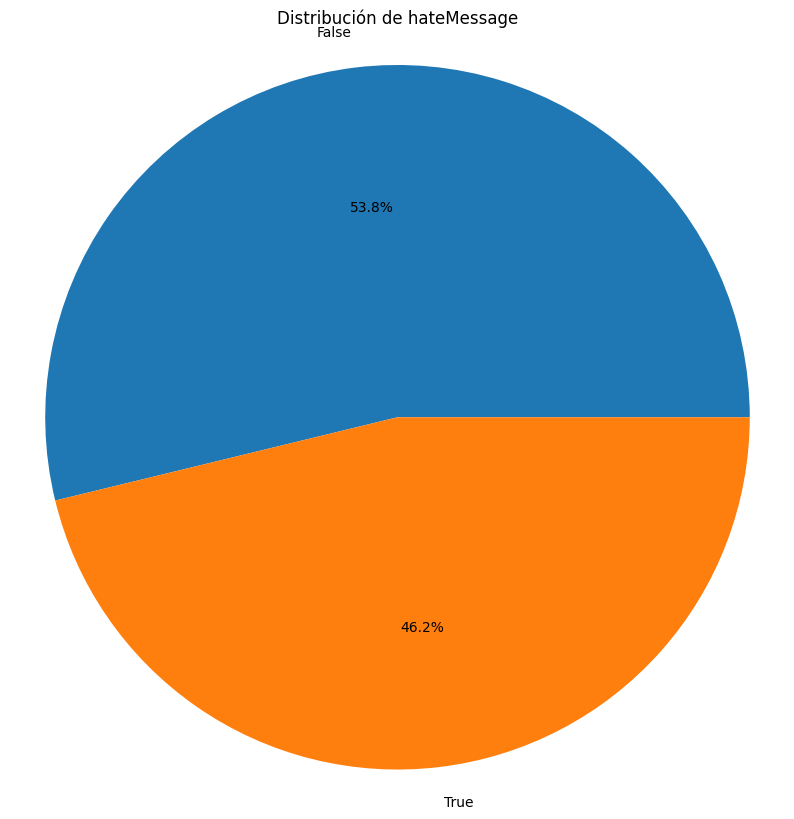

In [21]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
percentages_hate.plot(kind='bar')
plt.title('Distribución de hateMessage')
plt.xlabel('Valor')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)  # Establecer el límite del eje y de 0 a 100%

# Añadir etiquetas de porcentaje en las barras
for i, v in enumerate(percentages_hate):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Crear un gráfico de pastel
plt.figure(figsize=(10, 10))
plt.pie(percentages_hate, labels=percentages_hate.index, autopct='%1.1f%%')
plt.title('Distribución de hateMessage')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular
plt.show()